In [19]:
import matplotlib.pyplot as plt
import numpy as np

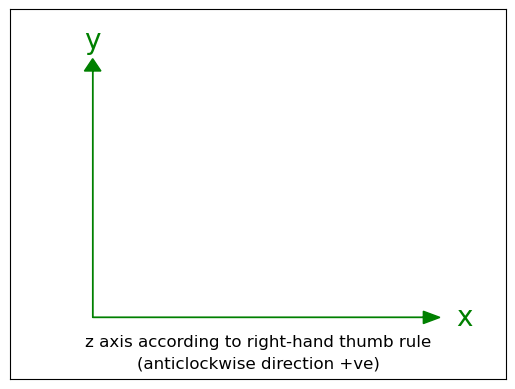

In [20]:
# Create a figure and axis
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()

# Set limits for better visibility
ax.set_xlim(-1, 5)
ax.set_ylim(-1, 5)

# Draw arrows to indicate x and y axes directions
ax.arrow(0, 0, 4, 0, head_width=0.2, head_length=0.2, fc='green', ec='green', label="x-axis")
ax.arrow(0, 0, 0, 4, head_width=0.2, head_length=0.2, fc='green', ec='green', label="y-axis")

# Add labels for clarity
plt.text(4.5, 0, 'x', color='green', fontsize=20, ha='center', va='center')
plt.text(0, 4.5, 'y', color='green', fontsize=20, ha='center', va='center')
# plt.text(-0.2, -0.2, 'Origin', color='black', fontsize=12, ha='right')

# Add text at the bottom for the z-axis
plt.text(2, -0.4, 'z axis according to right-hand thumb rule', color='black', fontsize=12, ha='center', va='center')

# Add text at the bottom for the z-axis
plt.text(2, -0.75, '(anticlockwise direction +ve)', color='black', fontsize=12, ha='center', va='center')

# Remove default ticks for a clean look
ax.set_xticks([])
ax.set_yticks([])

# Display the plot
plt.show()


In [21]:
import matplotlib.pyplot as plt
import numpy as np
class system:
    def __init__(self,name,length,breadth,height,modulus_of_elasticity,moment,force_concentrated,force_distributed,number_of_moments,number_of_concentrated_forces,number_of_distributed_forces):
        self.name = name
        self.length =length
        self.breadth=breadth
        self.height=height
        self.modulus_of_elasticity=modulus_of_elasticity
        self.moment=moment
        self.force_concentrated=force_concentrated
        self.force_distributed=force_distributed
        self.number_of_moments=number_of_moments
        self.number_of_concentrated_forces=number_of_concentrated_forces
        self.number_of_distributed_forces=number_of_distributed_forces

print("Assume length >> height > breadth\n")

L=float(input("Enter length of the structure (in meters) : "))
b=float(input("Enter breadth of the structure (in meters) : "))
h=float(input("Enter height of the structure (in meters) : "))
E=float(input("Enter modulus of elasticity of the structure (in MPa): \ne.g.; Steel-200 Gpa\nAluminium-70 Gpa\nConcrete-30GPa:\n"))
I=float(b*(h**3)/12)

structure_name=int(input("Specify the type of the structure\n #Enter 1 for Simply Supported Structure\n #Enter 2 for Cantilevered Structure\n #Enter 3 for beam with overhang\n"))


if(structure_name==1):
    L1= L              # BECAUSE  FOR  SIMPLY  SUPPORTED  STRUCTURE,  ROLLER  SUPPORT  SHOULD BE  AT  THE  EXTREME  OF  THE  BEAM

if(structure_name==2):          # BECAUSE  FOR  A CANTILEVERED  STRUCTURE  IF  FORMED  WHEN  THE  DISTANCE  BETWEEN  THE  PIN-JOINT  AND  THE  ROLLER  SUPPORT  TENDS  TO  ZERO
    L1=1E-10


if (structure_name==3):         # THIS  IS  THE  CASE  OF  BEAM  WITH  OVERHANG. SO THE DISTANCE OF ROLLER SUPPORT NEEDS TO BE SPECIFIED
    L1=float(input(f"Enter the distance of roller support from left end of the beam (in metres) - the distance should lie in the range of (0,{L}) : "))




m=int(input("Enter the number of moments acting : "))
M=np.zeros((m,2),dtype=float)
for i in range(m):
    M[i][0]=input(f"Enter value of the moment number {i+1} (in KN-m) : ")
    M[i][1]=input(f"Enter where the moment number {i+1} is acting (in meters) - the value should lie in the range of [0,{L}] : ")

n=int(input("Enter the number of concentrated forces acting : "))
F=np.zeros((n,2),dtype=float)
for i in range(n):
    F[i][0]=input(f"Enter value of the concentrated force number {i+1} (in KN) : ")
    F[i][1]=input(f"Enter where the force number {i+1} is acting (in meters) - the value should lie in the range of [0,{L}] : ")



p=int(input("Enter the number of distributed forces acting : "))
W=np.zeros((p,3),dtype=float)
for i in range(p):
    W[i][0]=input(f"Enter value of the distributed force number {i+1} (as force per unit length in KN/metre) : ")
    W[i][1]=input(f"Enter the starting point of this force (in metres) - the value should lie in the range of [0,{L}) : ")
    W[i][2]=input(f"Enter the ending point of this force (in metres) - the value should lie in the range of (0,{L}] : ")



# DECLARATION  OF  OUR  STRUCTURE :
S_1= system(structure_name,L,b,h,E,M,F,W,m,n,p)




# FOLLOWING  FUNCTION  RETURNS  VALUES  OF :
#         * BENDING MOMENT   (M)
#         * SHEAR  FORCE     (V)
#         * DEFLECTION       (Y)
#         * SLOPE            (dYdX)                FOR  ANY  X  VALUE

def M_V_Y_dYdX_F0(xf,f,L,x):        # f = FORCE ACTING ;  xf = WHERE THE FORCE ACTS ; L = LENGTH OF BEAM
    if (xf<L1):
        Ra= float(-f*(L1-xf)/L1)

        C1= f*xf**3/(6*L1) + f*xf*L1/2 -(Ra+f)*(L1**2)/6 - f*(xf**2)/2
        C1_prime_1= C1+ f*xf**2/2
        C2_prime_1= -f*xf**3/6
        C1_prime_2= (Ra+f)*L1**2/3 - f*xf*L1/2 + f*xf**3/6/L1

        if(x<xf):
            return [Ra*x,-Ra, (Ra*x**3/6 + C1*x)/(E*I), (Ra*x**2/2 + C1)/(E*I) ]
        elif( x>=xf and x<L1):
            return [Ra*x + f*(x-xf) , -(Ra + f), ( (Ra+f)*x**3/6 - f*xf*x**2/2 + C1_prime_1*x + C2_prime_1 )/(E*I), ( (Ra+f)*x**2/2 - f*xf*x + C1_prime_1 )/(E*I) ]
        else :
            return [0,0, C1_prime_2*(x-L1)/(E*I),  C1_prime_2/(E*I) ]
    else:
        Ra= float(-f*(L1-xf)/L1)

        C1= Ra*L1**2/3 + f*L1**2/2 - f*xf*L1
        C2= f*xf*L1**2/2 - f*L1**3/3 - Ra*L1**3/3

        if(x<L1):
            return [Ra*x,-Ra, (Ra*x**3/6 - Ra*L1**2*x/6)/(E*I) ,  (Ra*x**2/2 - Ra*L1**2/6)/(E*I) ]
        elif( x>=L1 and x<xf):
            return [-f*(x-xf) ,f,  ( f*xf*x**2/2 - f*x**3/6 + C1*x + C2 )/(E*I) , ( f*xf*x - f*x**2/2 + C1 )/(E*I)]
        else :
            return [0,0, ( (f*xf**2/2 + C1)*x + C2 - f*xf**3/6 )/(E*I), (f*xf**2/2 + C1)/(E*I)]

def M_V_Y_dYdX_M0(xM,M,L,x):      # M = MOMENT ACTING ; xM = WHERE THE MOMENT ACTS ;  L = LENGTH OF BEAM
    if (xM<L1):
        Ra= float(M/L1)

        C1= M*(L1**2/3 + xM**2/2 - L1*xM)/L1
        C1_prime_1= M*(L1**2/3 + xM**2/2)/L1
        C2_prime_1= -M*xM**2/2
        C1_prime_2= -M*L1 + Ra*L1**2/2 + C1_prime_1

        if(x<xM):
            return [Ra*x,-Ra, (Ra*x**3/6 +C1*x)/(E*I), (Ra*x**2/2 + C1)/(E*I)]
        elif( x>=xM and x<L1):
            return [Ra*x - M , -Ra, (-M*x**2/2 + Ra*x**3/6 + C1_prime_1*x + C2_prime_1)/(E*I), (-M*x + Ra*x**2/2 + C1_prime_1 )/(E*I)]
        else :
            return [0,0,C1_prime_2*(x-L1)/(E*I), C1_prime_2/(E*I) ]
    else:
        Ra= float(M/L1)

        C1_prime_2 = M*(xM - 2*L1/3)
        C2_prime_2= -M*xM**2/2 + M*L1**2/6

        if(x<L1):
            return [Ra*x,-Ra, ( Ra*x**3 - Ra*L1**2*x )/(6*E*I), ( Ra*(x**2/2 - L1**2/6) )/(E*I)]
        elif( x>=L1 and x<xM):
            return [M , 0 , ( M*x**2/2 - 2*M*L1*x/3 + M*L1**2/6)/(E*I), (M*x - 2*M*L1/3)/(E*I)]
        else :
            return [0,0, ( C1_prime_2*x + C2_prime_2 )/(E*I), C1_prime_2/(E*I)]

def M_V_Y_dYdX_W0(w0,x0,x1,L,x):            # w0 = VALUE OF CONCENTRATED FORCE ACTING PER UNIT LENGTH ; x0 AND x1 ARE STARTING AND ENDING POINTS OF THE FORCE
    Ra= -w0*(x1-x0)*(L1- (x1+x0)/2)/L1

    if(x1<=L1):

        C2_prime_2 = w0*(x1-x0)/3*( x1**3 + (x1-x0)**3/8 - (x1-x0)**2*x1/2 ) - w0*(x1-x0)*(x1+x0)*x1**2/4
        C1_prime_2 = -( C2_prime_2 + Ra*L1**3/6 + w0*(x1-x0)*L1**3/6 - w0*(x1-x0)*(x1+x0)*L1**2/4 )/L1
        C1_prime_1 = w0*(x1-x0)/2*( x1**2 - (x1-x0)**2/3 ) + C1_prime_2 - w0*(x1-x0)*(x1+x0)*x1/2
        C1 = C1_prime_1
        C2_prime_1 = 0.0
        C1_prime_3= Ra*L1**2/2 + w0*(x1-x0)*L1**2/2 + C1_prime_2 - w0/2*(x1-x0)*(x1+x0)*L1

        if (x<x0):
            return [Ra*x , -Ra, (Ra*x**3/6 + C1*x)/(E*I), (Ra*x**2/2 + C1)/(E*I)]
        elif (x>=x0 and x<x1):
            return [Ra*x + (w0*(x-x0)**2)/2 , -Ra-w0*(x-x0) , (Ra*x**3/6 + w0*(x-x0)**4/24 + C1_prime_1*x + C2_prime_1)/(E*I), (Ra*x**2/2 + w0*(x-x0)**3/6 + C1_prime_1)/(E*I) ]
        elif (x>=x1 and x<L1):
            return [ Ra*x + w0*(x1-x0)*(x-(x0+x1)/2) , -Ra - w0*(x1-x0), (Ra*x**3/6 + w0*(x1-x0)*x**3/6 + C1_prime_2*x + C2_prime_2 - w0/4*(x1-x0)*(x1+x0)*x**2 ) /(E*I), (Ra*x**2/2 + w0*(x1-x0)*x**2/2 + C1_prime_2 - w0*(x1-x0)*(x1+x0)*x/2)/(E*I)]
        else:
            return [0,0, C1_prime_3*(x-L1)/(E*I), C1_prime_3/(E*I)]

    elif(x0>=L1):

        C1_prime_1=L1**2*(Ra/3 + w0*(x1-x0)/2) + w0*L1*(x0-x1)/2*(x1+x0)
        C2_prime_1= -C1_prime_1*L1 - L1**2*w0*(x1-x0)/2*( (x1+x0)/2 - L1/3)
        C1_prime_2= C1_prime_1 + w0*(x1-x0)/2*(x0*x1 + (x1-x0)**2/3)
        C2_prime_2= C2_prime_1 + w0*(x1-x0)/12*( x0**2*(3*x1+x0) - (x1-x0)**3/2)  - C1_prime_2*x0 + C1_prime_1*x0

        if (x<L1):
            return [Ra*x , -Ra, Ra*(x**3 - L1**2*x)/(6*E*I), Ra*(x**2/2 - L1**2/6)/(E*I) ]
        elif (x>=L1 and x<x0):
            return [ w0*(x1-x0)*((x1+x0)/2-x) , w0*(x1-x0) , (C1_prime_1*x + w0/2*(x1-x0)*x**2*( (x1+x0)/2 - x/3) + C2_prime_1)/(E*I) , (C1_prime_1 + w0*x*(x1-x0)/2*(x1 + x0 - x ))/(E*I) ]
        elif (x>=x0 and x<x1):
            return [ w0*((x-x1)**2)/2,  w0*(x1-x), ( w0*(x-x1)**4/24 + C1_prime_2*x + C2_prime_2 )/(E*I), ( w0*(x-x1)**3/6 + C1_prime_2 )/(E*I) ]
        else:
            return [0,0, (C1_prime_2*x + C2_prime_2)/(E*I), C1_prime_2/(E*I) ]
    else:

        C1= -(Ra*L1**3/6 + w0*(L1-x0)**4/24)/L1
        C1_prime_2= Ra*L1**2/2 - w0*(L1-x1)**3/6 + C1 + w0*(L1-x0)**3/6
        C2_prime_2 = -(C1_prime_2*L1 + w0*(L1-x1)**4/24)

        if (x<x0):
            return [Ra*x , -Ra, (Ra*x**3/6 + C1*x)/(E*I), (Ra*x**2/2 + C1)/(E*I)]
        elif (x>=x0 and x<L1):
            return [Ra*x + (w0*(x-x0)**2)/2 , -Ra-w0*(x-x0), (Ra*x**3/6 + w0*(x-x0)**4/24 + C1*x)/(E*I), (Ra*x**2/2 + w0*(x-x0)**3/6 + C1)/(E*I) ]
        elif (x>=L1 and x<x1):
            return [ w0*((x-x1)**2)/2, w0*(x1-x), (w0*(x-x1)**4/24 + C1_prime_2*x + C2_prime_2)/(E*I), (w0*(x-x1)**3/6 + C1_prime_2)/(E*I) ]
        else:
            return [0,0, (C1_prime_2*x + C2_prime_2)/(E*I) , C1_prime_2/(E*I)]

def Moment_and_Shear_and_Deflection_and_Slope(x):
    moment=0
    shear=0
    deflection=0
    slope=0
    for i in range(m):
        xM= S_1.moment[i][1]
        M=S_1.moment[i][0]
        moment+=M_V_Y_dYdX_M0(xM,M,L,x)[0]
        shear+=M_V_Y_dYdX_M0(xM,M,L,x)[1]
        deflection+=M_V_Y_dYdX_M0(xM,M,L,x)[2]
        slope+=M_V_Y_dYdX_M0(xM,M,L,x)[3]
    for j in range(n):
        xf=S_1.force_concentrated[j][1]
        F=S_1.force_concentrated[j][0]
        moment+=M_V_Y_dYdX_F0(xf,F,L,x)[0]
        shear+=M_V_Y_dYdX_F0(xf,F,L,x)[1]
        deflection+=M_V_Y_dYdX_F0(xf,F,L,x)[2]
        slope+=M_V_Y_dYdX_F0(xf,F,L,x)[3]
    for k in range(p):
        x0=S_1.force_distributed[k][1]
        x1=S_1.force_distributed[k][2]
        w0=S_1.force_distributed[k][0]
        moment+=M_V_Y_dYdX_W0(w0,x0,x1,L,x)[0]
        shear+=M_V_Y_dYdX_W0(w0,x0,x1,L,x)[1]
        deflection+=M_V_Y_dYdX_W0(w0,x0,x1,L,x)[2]
        slope+=M_V_Y_dYdX_W0(w0,x0,x1,L,x)[3]
    return [moment,shear,deflection, slope]
X=np.linspace(0.001,L-0.001,10000)
BMD=[]
SFD=[]
Deflection=[]
Slope=[]
for i in X:
    BMD.append(Moment_and_Shear_and_Deflection_and_Slope(i)[0])
    SFD.append(Moment_and_Shear_and_Deflection_and_Slope(i)[1])
    Deflection.append(Moment_and_Shear_and_Deflection_and_Slope(i)[2])
    Slope.append(Moment_and_Shear_and_Deflection_and_Slope(i)[3])

Assume length >> height > breadth



Enter length of the structure (in meters) :  10
Enter breadth of the structure (in meters) :  1.5
Enter height of the structure (in meters) :  2
Enter modulus of elasticity of the structure (in MPa): 
e.g.; Steel-200 Gpa
Aluminium-70 Gpa
Concrete-30GPa:
 70000
Specify the type of the structure
 #Enter 1 for Simply Supported Structure
 #Enter 2 for Cantilevered Structure
 #Enter 3 for beam with overhang
 3
Enter the distance of roller support from left end of the beam (in metres) - the distance should lie in the range of (0,10.0) :  7
Enter the number of moments acting :  1
Enter value of the moment number 1 (in KN-m) :  -5
Enter where the moment number 1 is acting (in meters) - the value should lie in the range of [0,10.0] :  3
Enter the number of concentrated forces acting :  1
Enter value of the concentrated force number 1 (in KN) :  5
Enter where the force number 1 is acting (in meters) - the value should lie in the range of [0,10.0] :  4
Enter the number of distributed forces actin

In [22]:
import matplotlib.pyplot as plt
import numpy as np
print("\n\nMaximum deflection(in mm) : ",np.max(Deflection),"\nMinimumn deflection (in mm) : ",np.min(Deflection),"\n\nMaximum shear force (in KN) : ",np.round(np.max(SFD), 1),"\nMinimum shear force (in KN) : ",np.round(np.min(SFD), 1),"\n\nMaximum bending moment (in KN-m) : ",np.round(np.max(BMD), 1),"\nMinimum bending moment (in KN-m) : ",np.round(np.min(BMD), 1))



Maximum deflection(in mm) :  0.0012356202117034048 
Minimumn deflection (in mm) :  -0.0029387517006802745 

Maximum shear force (in KN) :  5.4 
Minimum shear force (in KN) :  -12.0 

Maximum bending moment (in KN-m) :  -0.0 
Minimum bending moment (in KN-m) :  -18.0


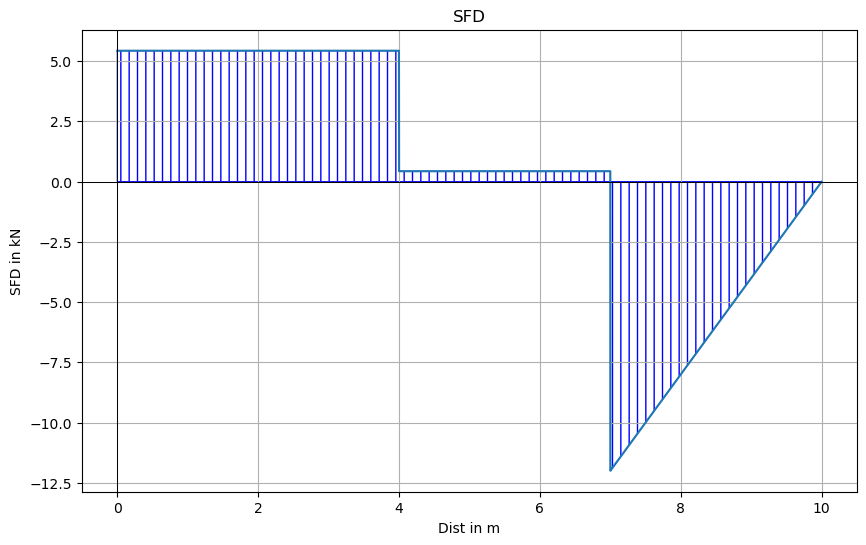

In [23]:
#SFD
import matplotlib.pyplot as plt
import numpy as np

# Create a single figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the SFD data
ax.plot(X, SFD)
ax.axvline(x=0, color="black", linewidth=0.7)
ax.axhline(y=0, color="black", linewidth=0.7)
ax.set_title("SFD")
ax.set_xlabel("Dist in m")
ax.set_ylabel("SFD in kN")

# Convert SFD to a NumPy array to enable element-wise comparison
SFD_array = np.array(SFD)

# Add hatching above the X-axis
ax.fill_between(X, SFD_array, where=(SFD_array > 0), color="none", edgecolor="blue", hatch="||", linewidth=0.7)

# Add hatching below the X-axis
ax.fill_between(X, SFD_array, where=(SFD_array < 0), color="none", edgecolor="blue", hatch="||", linewidth=0.7)


# Display the plot with a grid
plt.grid(True)
plt.show()

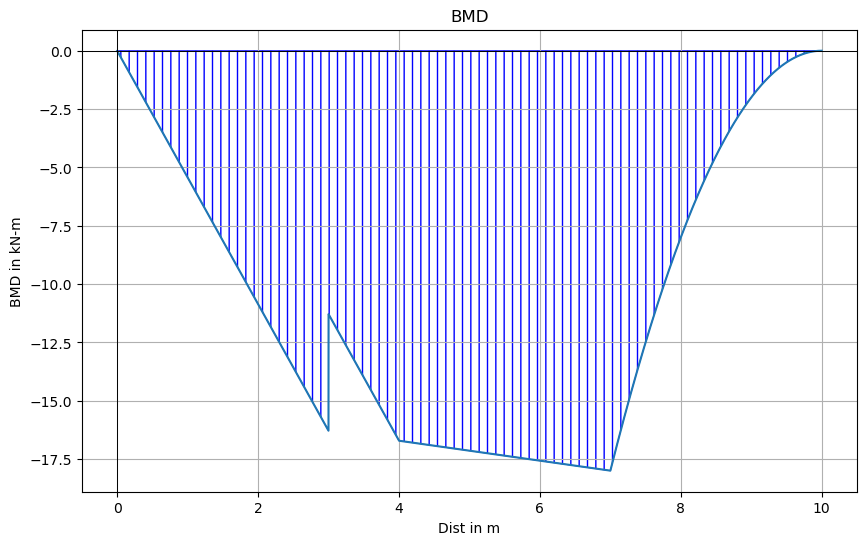

In [24]:
#BMD
import matplotlib.pyplot as plt
import numpy as np
# Create a single figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the BMD data
ax.plot(X, BMD)
ax.axvline(x=0, color="black", linewidth=0.7)
ax.axhline(y=0, color="black", linewidth=0.7)
ax.set_title("BMD")
ax.set_xlabel("Dist in m")
ax.set_ylabel("BMD in kN-m")
plt.ylim=( np.min(BMD),np.max(BMD))
plt.xlim=(0,L)

# Convert BMD to a NumPy array to enable element-wise comparison
BMD_array = np.array(BMD)

# Add hatching above the X-axis
ax.fill_between(X, BMD_array, where=(BMD_array > 0), color="none", edgecolor="blue", hatch="||", linewidth=0.7)

# Add hatching below the X-axis
ax.fill_between(X, BMD_array, where=(BMD_array < 0), color="none", edgecolor="blue", hatch="||", linewidth=0.7)


# Display the plot with a grid
plt.grid(True)
plt.show()

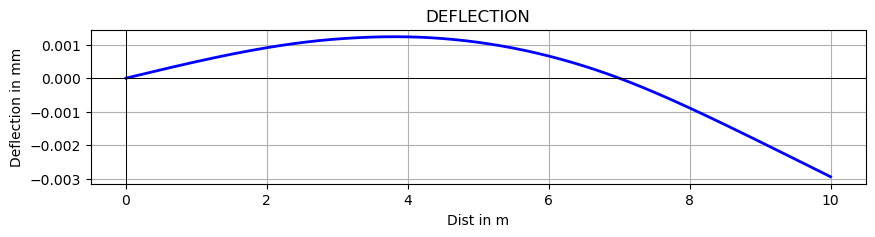

In [25]:
# Deflection
import matplotlib.pyplot as plt
import numpy as np
# Create a single figure and axis
fig, ax = plt.subplots(figsize=(10, 2))

# Plot the deflection data
ax.plot(X, Deflection, linewidth=2.0, color="blue")
ax.axvline(x=0, color="black", linewidth=0.7)
ax.axhline(y=0, color="black", linewidth=0.7)
ax.set_title("DEFLECTION")
ax.set_xlabel("Dist in m")
ax.set_ylabel("Deflection in mm")


# Display the plot with a grid
plt.grid(True)
plt.show()


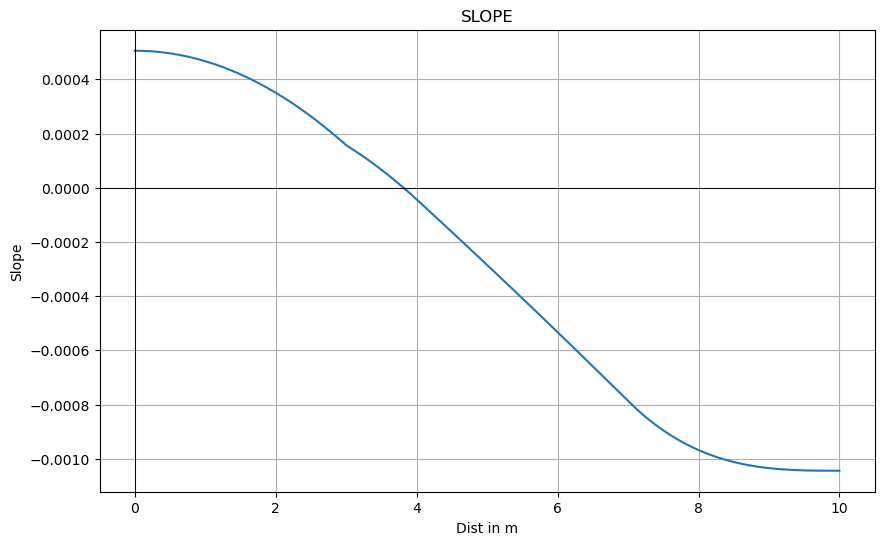

In [26]:
# Slope
import matplotlib.pyplot as plt
import numpy as np
# Create a single figure and axis.
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the deflection data
ax.plot(X, Slope)
ax.axvline(x=0, color="black", linewidth=0.7)
ax.axhline(y=0, color="black", linewidth=0.7)
ax.set_title("SLOPE")
ax.set_xlabel("Dist in m")
ax.set_ylabel("Slope")


# Display the plot with a grid
plt.grid(True)
plt.show()